# 2016 Fake News on Facebook Politics Pages and Current Engagement

Sam DeMarinis and Nick Radwin

[Link to our webpage](https://nradwin.github.io/)

# Project Goals
The goal of this project is to analyze how nine Facebook news pages’ overall engagement today has changed with respect to their amount of fake news reported in 2016. We are taking pre-existing data and gathering our own from a different social media platform's perspective to make conclusions about the relationship between a news source's amount of fake news in 2016 and their popularity today.

#Project Dataset

The dataset that we are considering working with comes from a study conducted in BuzzFeed’s 2016 article "Fact-Checking Facebook Politics Pages." At the time of the 2016 presidential election, there were increasing amounts of fake news being spread on Facebook and other platforms. BuzzFeed News decided to conduct a study to determine the frequency of misinformation being spread from the Left and from the Right. They did so by analyzing three hyperpartisan right- and left-wing Facebook pages as well as three large mainstream political news pages. Over the course of seven weekdays, they kept track of each post made by each of these news sources and manually fact checked them. Posts were rated “Mostly True”  or “Mostly False” (a post that was “satirical or opinion-driven” was labeled as “no factual content”). They also analyzed the engagement statistics (reactions, shares, comments) for each of these posts, as well as the kind of media it was (link, photo, video, etc.). In total, 2,282 posts were rated: 1,145 from mainstream pages, 666 from hyperpartisan right-wing pages, and 471 from hyperpartisan left-wing pages (link to the BuzzFeed article: *Hyperpartisan Facebook Pages Are Publishing False And Misleading Information At An Alarming Rate* https://www.buzzfeednews.com/article/craigsilverman/partisan-fb-pages-analysis).

Since BuzzFeed news already provided us with an in-depth analysis of the data that they collected, we are interested in combining this dataset with other dataset(s) in order to answer questions of our own. One such question that we are hoping to answer is how the engagement of these news pages has changed from 2016 to 2022. Are pages that contained large amounts of fake news in 2016 more or less popular now? Do they cease to exist?

If we are to use another dataset to make new insights, we will consider how memes influence the frequency and momentum of misinformation in the pubic media, since our primary dataset does not consider satirical content. Looking at this relationship would give us a much more well-rounded view of how misinformation manifests over time, as memes often spark new interest in social issues and can be very polarizing because of their opinion-driven nature.



#Colaboration Plan

Our collaboration plan is to meet at least twice a week to finalize milestones 1, due October 14, and 2, due November 18. Our workflow starts in a shared google doc, making it easier compared to Google Colab for seeing live updates from each other. From the google doc, our work is formatted in Colab; Colab allows us to fill the gaps in our project that google docs leaves, since we can’t deal with our data in docs. Our milestones are then finalized in Colab with plotting commands, relevant data concatenation, and other data visualizations or insights.

#ETL (Extraction, Transform, and Load)


We are going to load the dataset created by BuzzFeed News into a pandas DataFrame. The dataset is already grouped by the Facebook accounts, and each observational unit is a post. Columns consist of each post's account_id, post_id, Category, Page, Post URL, Date Published, Post Type, Rating, Debate, share_count, reaction_count, and comment_count.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd

buzzfeed_df = pd.read_csv("facebook-fact-check.csv")
buzzfeed_df

FileNotFoundError: ignored

Clearly, this data is already tidy and does not require much ETL. However, there are some columns that are unnecessary for our purposes. Since we are primarily using BuzzFeed’s dataset to see how these newspages’ levels of fake news have trended with their current engagement on social media, we can disregard and remove columns such as Post URL, Debate, account_id, and post_id because they do not add necessary information to our analysis. We can also reorder the columns to our liking.

In [ ]:
buzzfeed_df.drop(['Post URL', 'Debate', 'account_id', 'post_id'], axis=1, inplace=True)
buzzfeed_df = buzzfeed_df[['Page', 'Category', 'Date Published', 'Post Type', 'Rating', 'share_count', 'reaction_count', 'comment_count']]
buzzfeed_df

,Page,Category,Date Published,Post Type,Rating,share_count,reaction_count,comment_count
0,ABC News Politics,mainstream,2016-09-19,video,no factual content,NaN,146.0,15.0
1,ABC News Politics,mainstream,2016-09-19,link,mostly true,1.0,33.0,34.0
2,ABC News Politics,mainstream,2016-09-19,link,mostly true,34.0,63.0,27.0
3,ABC News Politics,mainstream,2016-09-19,link,mostly true,35.0,170.0,86.0
4,ABC News Politics,mainstream,2016-09-19,video,mostly true,568.0,3188.0,2815.0
...,...,...,...,...,...,...,...,...
2277,The Other 98%,left,2016-09-27,photo,no factual content,21563.0,33388.0,391.0
2278,The Other 98%,left,2016-09-27,link,mostly true,1451.0,4828.0,342.0
2279,The Other 98%,left,2016-09-27,link,mixture of true and false,8236.0,12083.0,856.0
2280,The Other 98%,left,2016-09-27,link,mostly true,3985.0,12966.0,538.0


The 'Page' variable was kept because it is vital for us to know which news page a post came from. The 'Category', 'Date Published', and 'Post Type' variables were kept because they provide interesting characteristics of these posts and may be potentially useful for further analysis later on. The 'Rating', 'share_count', 'reaction_count', and 'comment_count' variables are arguably the most important variables to keep because of the focus of our analysis. We want to be able to see if there are relationships between a news source's amount of fake news published in 2016 and increase/decrease in engagement in 2022. Therefore, knowing this information for the sources in 2016 is essential to be able to compare to 2022. 

We can now perform summary statistics on this dataset (though in-depth analysis has already been done in BuzzFeed’s article about this study). If we wanted to find the total number of shares across all posts by a specific newspage, such as ABC News Politics, we could do so with the following command:

In [ ]:
buzzfeed_df[(buzzfeed_df["Page"] == "ABC News Politics")]["share_count"].sum()

7828.0

Or if we wanted to know how many posts there were in each Rating category for a specific newspage, we could do so with the following command:

In [ ]:
buzzfeed_df[(buzzfeed_df["Page"] == "Right Wing News")]["Rating"].value_counts()

mostly true                  142
mixture of true and false     89
mostly false                  26
no factual content            11
Name: Rating, dtype: int64

Finally, let's say that we want to visually compare the amount of "mostly true" posts from all left-wing news pages to the amount of "mostly true" posts from all right-wing news pages. We could do so with the following commands:

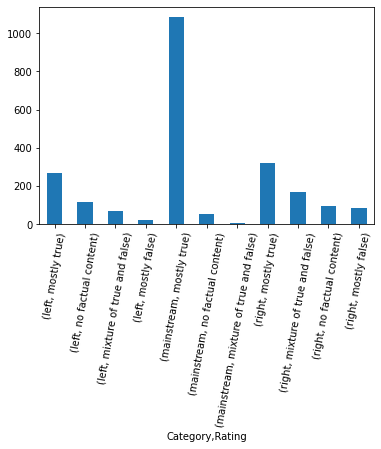

In [ ]:
buzzfeed_copy = buzzfeed_df.copy()
buzzfeed_copy.groupby("Category")["Rating"].value_counts().plot.bar(rot=80)

# Extracting Twitter Data Using Twitter's API
We want to build our own dataset containing the Twitter engagement statistics of each newspage's 100 most recent tweets. In order to do this, we must utilize Twitter's API. A very useful library that that we can easily use in CoLab is called tweepy, and it will allow us to do everything necessary for our analysis. We registered an account as a Twitter developer, created an App for our project, and obtained all of our identifying information. We can now authenticate the app that we created in the Twitter Developer Portal.

In [ ]:
import tweepy

api_key = "uuBeZFnYWcIL2LvEY1cmciVF6"
api_secret = "7c0jLKgHDpneApG4JpyYjSERxOAK5DMwIhTPAoJhynQeaGnpem"
access_token = "1146497335423320064-CEg7bnY25v6umjpjbMaA2uE3RYuxW8"
access_secret = "wWxyB0gGFCYfc6OtaZJLMb4cOkxNGs5Bn95N7zaFPr9LW"

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

We can use the following commands to pull the 100 latest tweets from each of the news sources:

In [ ]:
userID = "politico"
tweets = api.user_timeline(screen_name=userID, 
                           count=100,
                           include_rts = False,
                           tweet_mode = 'extended'
                           )

All of the structure for the code above was found on https://fairyonice.github.io/extract-someones-tweet-using-tweepy.html and https://www.jcchouinard.com/how-to-use-twitter-api-with-python/ 

At the moment, the above commands result in the following error message: 

"*You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal.*"

In order to actually access the data, I plan to apply for Elevated access for Twitter's API. I will then be able to pull the latest 100 tweets from each news source, load the engagement statistics data into a pandas dataframe, and analyze it alongside the buzzfeed_df dataframe.

In [ ]:
%%shell
jupyter nbconvert --to html Milestone1.ipynb

[NbConvertApp] Converting notebook Milestone1.ipynb to html
[NbConvertApp] Writing 347272 bytes to Milestone1.html
